<a href="https://colab.research.google.com/github/azriawi/Artificial-Intelligence-Project/blob/main/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [ ]:
#Store the data into a data frame 
df = pd.read_csv('BTC-USD.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,18/5/2020,9675.695313,9906.030273,9570.359375,9726.575195,9726.575195,4.182714e+10
1,19/5/2020,9727.063477,9836.047852,9539.624023,9729.038086,9729.038086,3.925429e+10
2,20/5/2020,9725.329102,9804.793945,9447.201172,9522.981445,9522.981445,3.654624e+10
3,21/5/2020,9522.740234,9555.242188,8869.930664,9081.761719,9081.761719,3.932616e+10
4,22/5/2020,9080.334961,9232.936523,9008.638672,9182.577148,9182.577148,2.981077e+10
5,23/5/2020,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10


In [ ]:
#Get the number of trading days
df.shape

(366, 7)

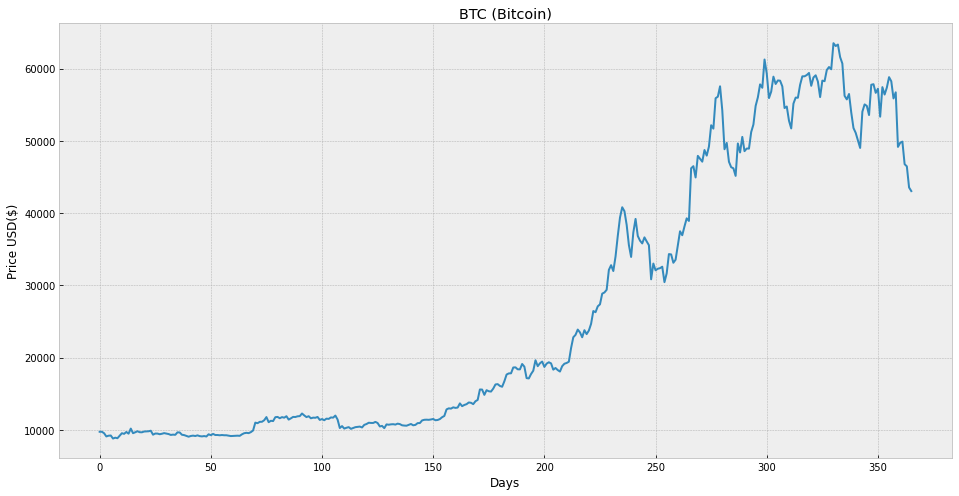

In [ ]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('BTC (Bitcoin)')
plt.xlabel('Days')
plt.ylabel('Price USD($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,9726.575195
1,9729.038086
2,9522.981445
3,9081.761719


In [ ]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
362,46760.18750,NaN
363,46456.05859,NaN
364,43537.51172,NaN
365,43035.87500,NaN


In [ ]:
#Create the feature data set (X) and convert it to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 9726.575195]
 [ 9729.038086]
 [ 9522.981445]
 [ 9081.761719]
 [ 9182.577148]
 [ 9209.287109]
 [ 8790.368164]
 [ 8906.93457 ]
 [ 8835.052734]
 [ 9181.017578]
 [ 9525.750977]
 [ 9439.124023]
 [ 9700.414063]
 [ 9461.058594]
 [10167.26856 ]
 [ 9529.803711]
 [ 9656.717773]
 [ 9800.636719]
 [ 9665.533203]
 [ 9653.679688]
 [ 9758.852539]
 [ 9771.489258]
 [ 9795.700195]
 [ 9870.094727]
 [ 9321.78125 ]
 [ 9480.84375 ]
 [ 9475.277344]
 [ 9386.788086]
 [ 9450.702148]
 [ 9538.024414]
 [ 9480.254883]
 [ 9411.84082 ]
 [ 9288.018555]
 [ 9332.34082 ]
 [ 9303.629883]
 [ 9648.717773]
 [ 9629.658203]
 [ 9313.610352]
 [ 9264.813477]
 [ 9162.917969]
 [ 9045.390625]
 [ 9143.582031]
 [ 9190.854492]
 [ 9137.993164]
 [ 9228.325195]
 [ 9123.410156]
 [ 9087.303711]
 [ 9132.488281]
 [ 9073.942383]
 [ 9375.474609]
 [ 9252.277344]
 [ 9428.333008]
 [ 9277.967773]
 [ 9278.807617]
 [ 9240.34668 ]
 [ 9276.5     ]
 [ 9243.614258]
 [ 9243.213867]
 [ 9192.836914]
 [ 9132.227539]
 [ 9151.392578]
 [ 9159.040039]
 [ 9185.

In [ ]:
#Create the target data set (y) and convert it to numpy array and get all of the target values except the last 'x' days/rows
y = np.array(df['Prediction'][:-future_days])
print(y)

[ 9480.84375   9475.277344  9386.788086  9450.702148  9538.024414
  9480.254883  9411.84082   9288.018555  9332.34082   9303.629883
  9648.717773  9629.658203  9313.610352  9264.813477  9162.917969
  9045.390625  9143.582031  9190.854492  9137.993164  9228.325195
  9123.410156  9087.303711  9132.488281  9073.942383  9375.474609
  9252.277344  9428.333008  9277.967773  9278.807617  9240.34668
  9276.5       9243.614258  9243.213867  9192.836914  9132.227539
  9151.392578  9159.040039  9185.817383  9164.231445  9374.887695
  9525.363281  9581.072266  9536.892578  9677.113281  9905.166992
 10990.87305  10912.82324  11100.46777  11111.21387  11323.4668
 11759.59277  11053.61426  11246.34863  11205.89258  11747.02246
 11779.77344  11601.47266  11754.0459   11675.73926  11878.11133
 11410.52539  11584.93457  11784.1377   11768.87109  11865.69824
 11892.80371  12254.40234  11991.2334   11758.2832   11878.37207
 11592.48926  11681.8252   11664.84766  11774.5957   11366.13477
 11488.36328  1132

In [ ]:
#Split the data into 75% training and 25% testing 
x_train, x_test, y_train,y_test= train_test_split(X,y,test_size = 0.25)

In [ ]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#Get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future 

array([[58917.69141],
       [58918.83203],
       [59095.80859],
       [59384.3125 ],
       [57603.89063],
       [58758.55469],
       [59057.87891],
       [58192.35938],
       [56048.9375 ],
       [58323.95313],
       [58245.00391],
       [59793.23438],
       [60204.96484],
       [59893.45313],
       [63503.45703],
       [63109.69531],
       [63314.01172],
       [61572.78906],
       [60683.82031],
       [56216.18359],
       [55724.26563],
       [56473.03125],
       [53906.08984],
       [51762.27344],
       [51093.65234]])

In [ ]:
#Show model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[49004.25391 49004.25391 54021.75391 55033.11719 54824.70313 49004.25391
 57750.17578 57828.05078 58758.55469 57200.29297 53333.53906 57424.00781
 57356.40234 57356.40234 55859.79688 58232.31641 55859.79688 56704.57422
 49150.53516 49716.19141 49880.53516 46760.1875  46456.05859 43537.51172
 43035.875  ]

[61537.50940327 61538.63739354 61713.6543482  61998.96374588
 60238.25592275 61380.13475371 61676.14465153 60820.20874486
 58700.52029574 60950.34539899 60872.27035867 62403.35776356
 62810.52926272 62502.46682311 66072.49829452 65683.0965732
 65885.15065237 64163.20799881 63284.08251792 58865.91452282
 58379.44341442 59119.91819011 56581.39970847 54461.32110775
 53800.1034372 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


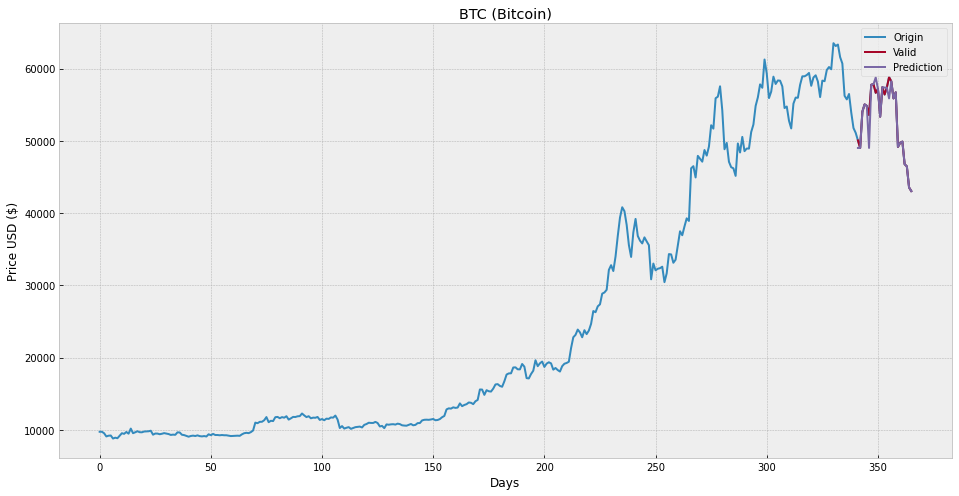

In [ ]:
#Visualize the data
prediction = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('BTC (Bitcoin)')
plt.xlabel('Days')
plt.ylabel('Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Origin', 'Valid', 'Prediction'])
plt.show()